<a href="https://colab.research.google.com/github/elsedore/daily-analysis/blob/main/dooat_analysis-final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Status           Identifiant  Numro de version                  Nom  \
0  Active  05470_EDF_H_00106295                 1      GRAND MAISON 10   
1  Active  05470_EDF_T_00170946                 2             PALUEL 3   
2  Active  05470_EDF_T_00170941                 2  MARTIGUES PONTEAU 5   
3  Active  05470_EDF_T_00170902                 2          CORDEMAIS 4   
4  Active  05470_EDF_T_00171008                 1          TRICASTIN 4   

                                              Filire         Date de dbut  \
0  Station de transfert d'ï¿½nergie par pompage h...  2024-09-02 11:15:00   
1                                        Nuclï¿½aire  2024-09-03 00:00:00   
2                                        Gaz fossile  2024-09-03 00:00:00   
3                                    Houille fossile  2024-09-03 00:00:00   
4                                        Nuclï¿½aire  2024-09-03 00:00:00   

           Date de fin        Type                           Cause  \
0  2024-09-02 17:15:00

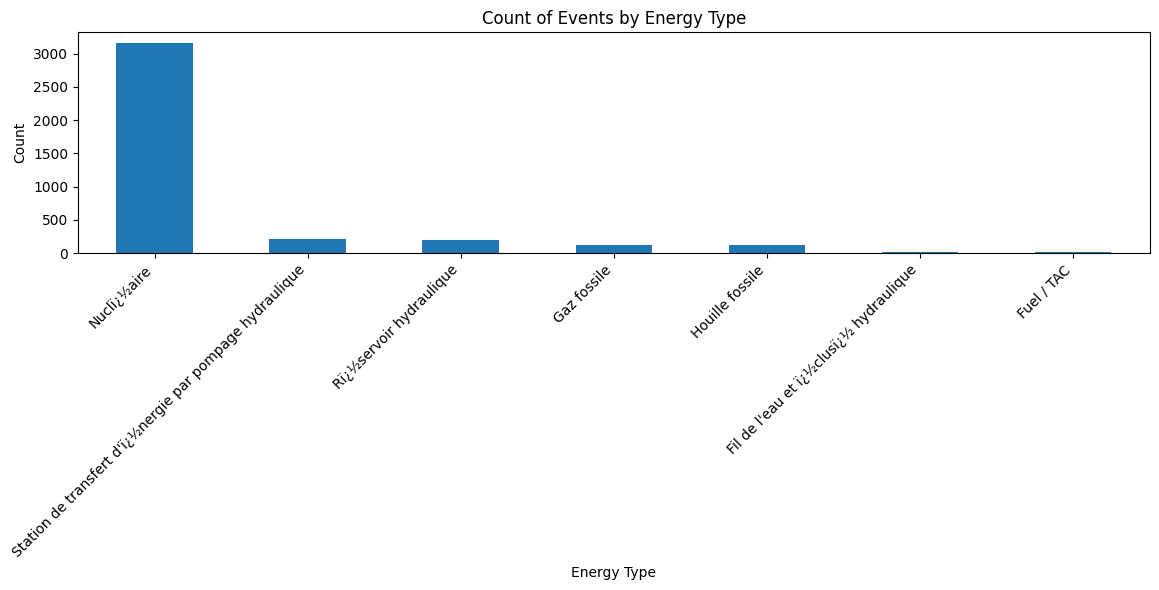


Maximum Power vs Available Power


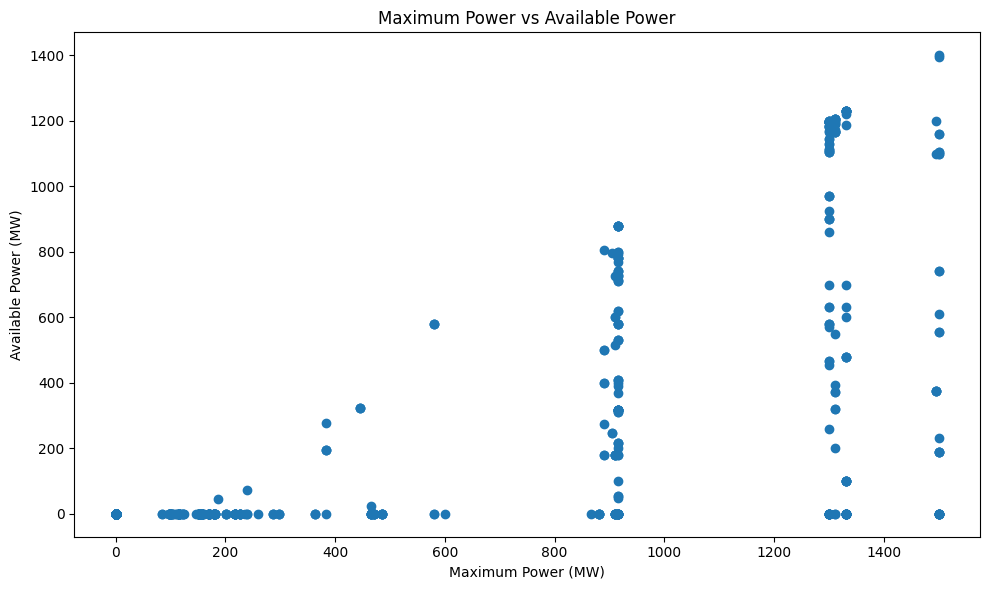


Timeline of Events


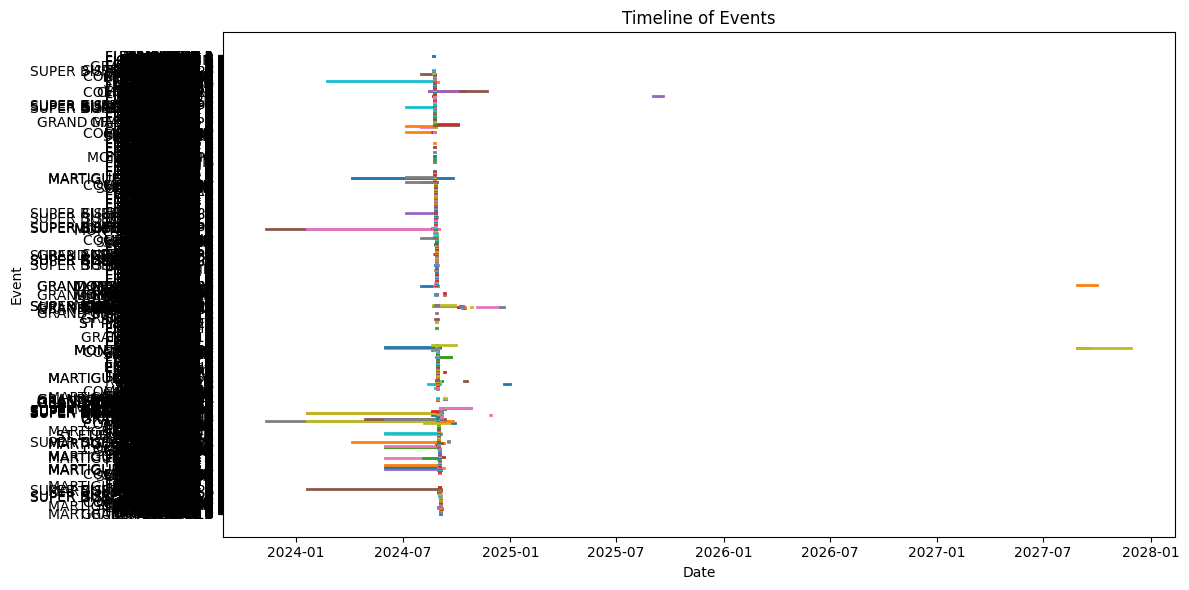


Average event duration by energy type:
Filire
Fil de l'eau et ï¿½clusï¿½ hydraulique                     2 days 17:11:45.714285714
Fuel / TAC                                                 1 days 17:24:36.923076923
Gaz fossile                                                5 days 05:54:12.100840336
Houille fossile                                            2 days 22:47:19.655172413
Nuclï¿½aire                                                2 days 03:56:34.773805757
Rï¿½servoir hydraulique                                    2 days 12:07:56.716417910
Station de transfert d'ï¿½nergie par pompage hydraulique   2 days 04:55:22.222222222
Name: Duration, dtype: timedelta64[ns]


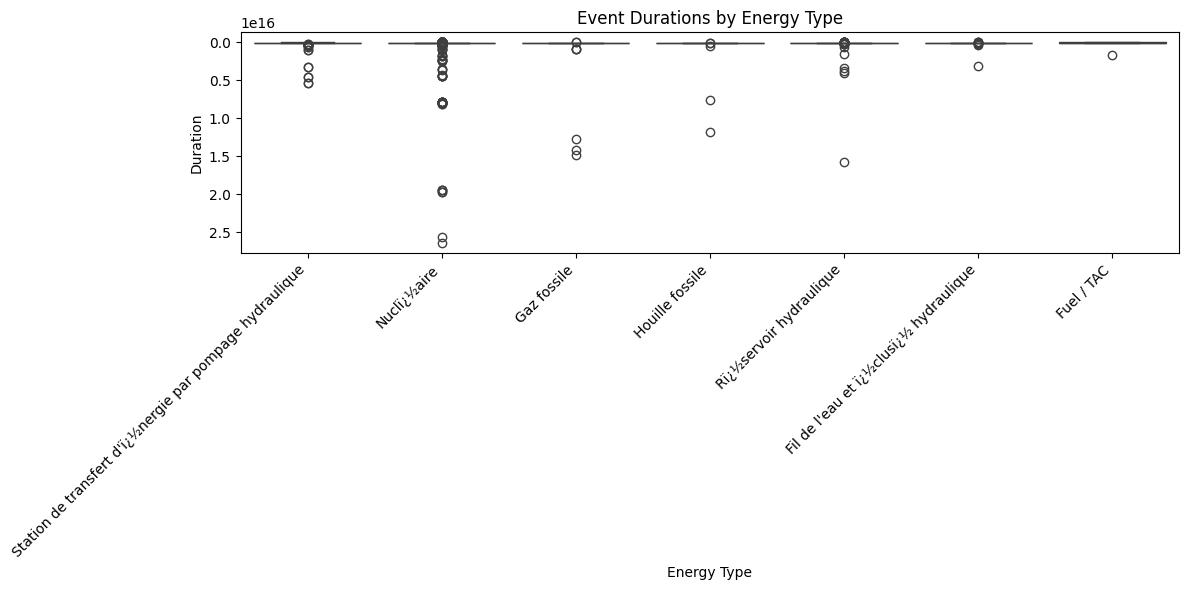

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/elsedore/daily-analysis/main/dooatdata.csv'
#Here are the columns contained in the dataset: Status;Identifiant;Numéro de version;Nom;Filiere;
#Date de debut;Date de fin;Type;Cause;Information complémentaire;Puissance maximale (MW);Puissance disponible (MW);Date de publication

# Reading csv file
df = pd.read_csv(url, sep=';', encoding='latin-1', quotechar='"')

# Function to clean column names
def clean_column_name(col):
    return col.encode('ascii', 'ignore').decode('ascii')

# Clean column names
df.columns = [clean_column_name(col) for col in df.columns]


# Displaying some basic information about the dataset
print(df.head())
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Converting date columns to datetime
date_columns = ['Date de dbut', 'Date de fin', 'Date de publication']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

#replacing missing value
df.fillna(0, inplace=True)

# Group by status
df_status = df.groupby('Status')
print(df_status)
print(df_status.head())

# Converting power columns to numeric, replacing comma with dot
power_columns = ['Puissance maximale (MW)', 'Puissance disponible (MW)']
for col in power_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Count of events by energy type
energy_type_counts = df['Filire'].value_counts()
print("\nCount of events by energy type:")
print(energy_type_counts)

print('\nEvents by Energy type')

# Visualization: Bar plot of event counts by energy type
plt.figure(figsize=(12, 6))
energy_type_counts.plot(kind='bar')
plt.title('Count of Events by Energy Type')
plt.xlabel('Energy Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print('\nMaximum Power vs Available Power')

# Visualization: Scatter plot of maximum power vs available power
plt.figure(figsize=(10, 6))
plt.scatter(df['Puissance maximale (MW)'], df['Puissance disponible (MW)'])
plt.title('Maximum Power vs Available Power')
plt.xlabel('Maximum Power (MW)')
plt.ylabel('Available Power (MW)')
plt.tight_layout()
plt.show()

print('\nTimeline of Events')

# Visualization: Timeline of events
plt.figure(figsize=(12, 6))
for i, row in df.iterrows():
    plt.plot([row['Date de dbut'], row['Date de fin']], [i, i], linewidth=2)
plt.yticks(range(len(df)), df['Nom'])
plt.title('Timeline of Events')
plt.xlabel('Date')
plt.ylabel('Event')
plt.tight_layout()
plt.show()


# Analysis of event durations
df['Duration'] = df['Date de fin'] - df['Date de dbut']
print("\nAverage event duration by energy type:")
print(df.groupby('Filire')['Duration'].mean())

# Visualization: Box plot of event durations by energy type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Filire', y='Duration', data=df)
plt.title('Event Durations by Energy Type')
plt.xlabel('Energy Type')
plt.ylabel('Duration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()